# The I-94 Traffic Dataset
* The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

* Exploring the data

In [2]:
df = pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
#Checking Missing values
df.isna().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

* Plotting a graphic to examine the distribution of the traffic volume column:

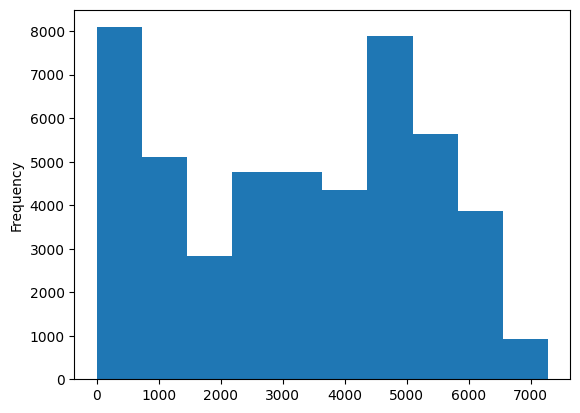

In [4]:
df['traffic_volume'].plot.hist() #using pandas method
plt.show()

In [5]:
df.traffic_volume.describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

* It seems like we have a lot of traffic in a few days of the week. About 25% of the time, there were 1,1193 cars or fewer passing the station each hour, this probably occurs during the nightm or when a road is under construction.
* About 75% of the time, the traffic volume was four time as much(4,933 cars or more)
* Let´s check if daytime and nighttime are factors that influence in the traffic volume:

# Traffic Volume: Day vs. Night
We'll start by dividing the dataset into two parts:

* Daytime data: hours from 7 AM to 7 PM (12 hours)
* Nighttime data: hours from 7 PM to 7 AM (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [6]:
df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

In [7]:
#transforming the columns to datetime
df['date_time'] = pd.to_datetime(df['date_time'])

df['hour'] = df['date_time'].dt.hour

day = df.copy()[(df['hour'] >= 7) & (df['hour'] < 19)] #making a copy of the dataframe and getting the info
print(day.shape)

night = df.copy()[(df['hour'] >= 19) | (df['hour'] < 7)] #boolean mask '|' to get the info that attends one of the conditions
print(night.shape)


(23877, 10)
(24327, 10)


* Now we´ll compare the traffic volume for both day and night

In [8]:
day.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452,12.431419
std,13.298885,63.62932,0.008853,37.564588,1174.546482,3.473405
min,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000,9.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000,12.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000,15.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000,18.000000


In [9]:
day.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'hour'],
      dtype='object')

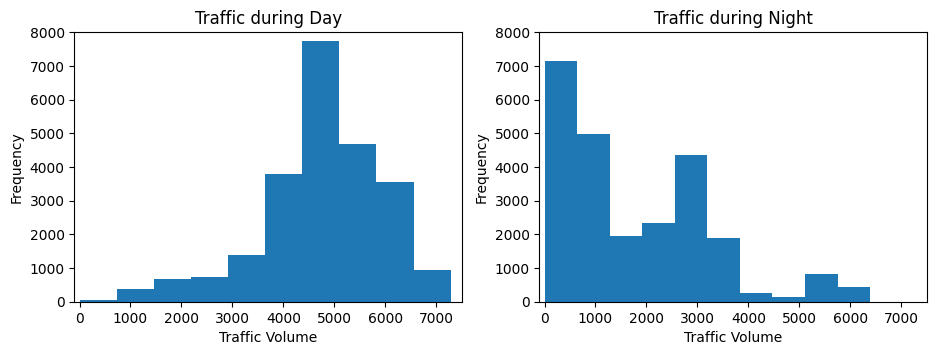

In [16]:
plt.figure(figsize = (11,3.5))

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title("Traffic during Day")
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')


plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic during Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [17]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [18]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.


Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.






### Time idicators
Checking out when heavy traffic is more present in a certain month, on a certain day, or at a certain time of day.

In [19]:
#Month time information
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-19-b104fbd4ed31>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_month = day.groupby('month').mean()


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

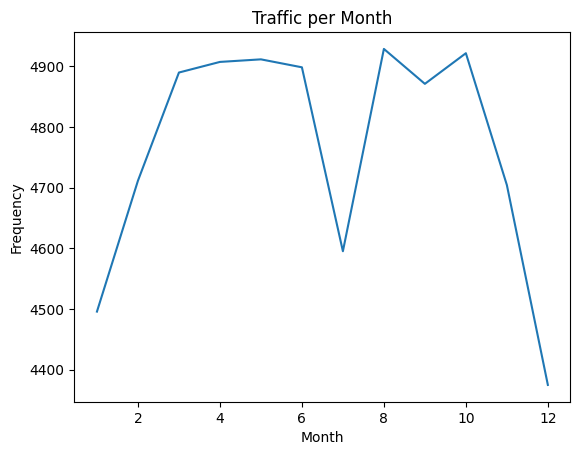

In [22]:
#Plotting the month´s graphic
by_month['traffic_volume'].plot.line()
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Traffic per Month')
plt.show()

The traffic looks less heavy during cold months (Novemmber - Ferbruary) and more intense during warm months, with the execption of July. Is there anything special about July, let´s check:

<ipython-input-23-8ccc65e2ab4c>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  only_july.groupby('year').mean()['traffic_volume'].plot.line()


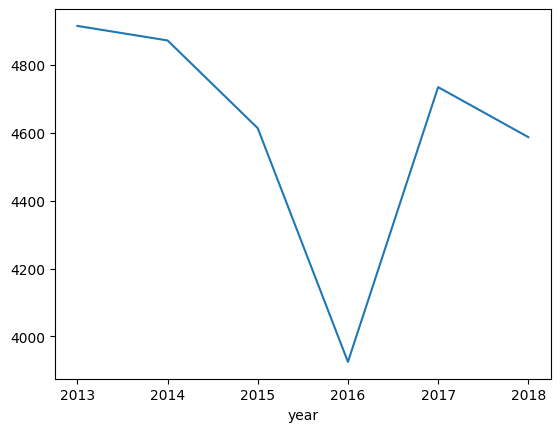

In [23]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7] #getting the month of july
only_july.groupby('year').mean()['traffic_volume'].plot.line() #grouping all the months of july with the years
plt.show()

From what we can see, only in 2016, there was a big diffrence in traffic. One of the possible reasons could be the road construction in 2016.

In general, warm months tend to have higher volume of traffic compared to cold months.

### Now, what days of the week have more traffic? Let´s find out:

In [25]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_day = day.groupby('dayofweek').mean()
by_day['traffic_volume']

<ipython-input-25-34a1c28b2a1d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_day = day.groupby('dayofweek').mean()


dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

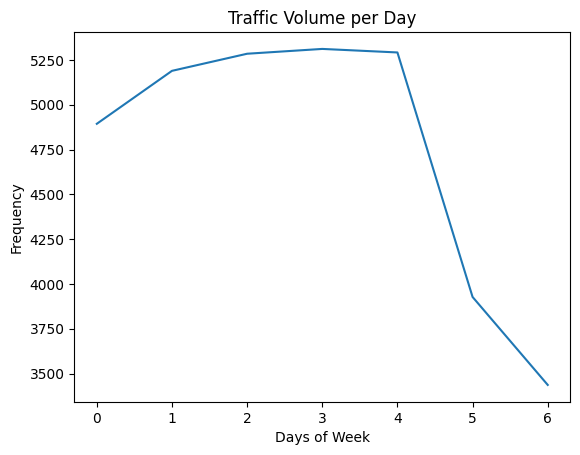

In [27]:
#graphic:
by_day['traffic_volume'].plot.line() #0 = monday, #6 = sunday
plt.xlabel("Days of Week")
plt.ylabel('Frequency')
plt.title('Traffic Volume per Day')
plt.show()

Everything here seems normal. Like in every part of the world, the traffic during business days is much heavier compared to the Saturday and Sunday.

### We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [31]:
day['hour'] = day['date_time'].dt.hour

#Separating bussiness day from weekends
business_day = day.copy()[day['dayofweek'] <= 4]
weekend = day.copy()[day['dayofweek'] >= 5]

#grouping the hour of each day
by_hour_business = business_day.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-31-6b4dcb310af4>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_business = business_day.groupby('hour').mean()
<ipython-input-31-6b4dcb310af4>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_weekend = weekend.groupby('hour').mean()


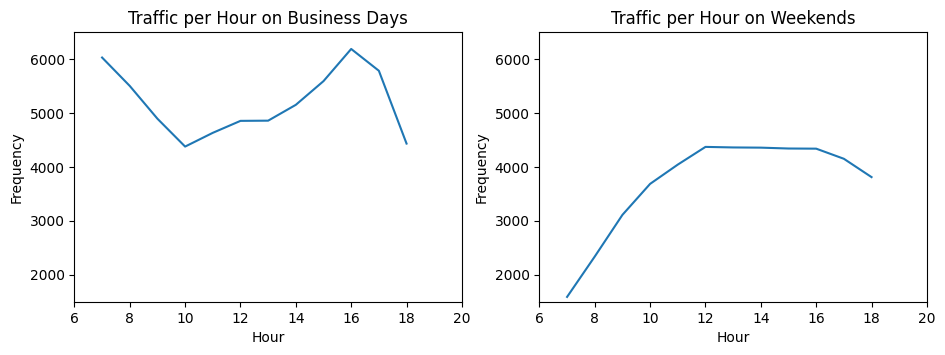

In [37]:
#graphics:
plt.figure(figsize = (11, 3.5))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6, 20)
plt.ylim(1500,6500) #based on the info obtained above
plt.title('Traffic per Hour on Business Days')
plt.xlabel('Hour')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6, 20)
plt.ylim(1500,6500)
plt.title('Traffic per Hour on Weekends')
plt.xlabel('Hour')
plt.ylabel('Frequency')

plt.show()

The traffic volume is generally higher during business days compared to the weekends. The *rush* time in businees´days is at 7 and 16, when people go and come back from work.

To summarize, we found a few time-related indicators of heavy traffic:

* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

In [44]:
day.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,month,year,dayofweek
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000,23877.000000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452,12.431419,6.522218,2015.509947,2.983457
std,13.298885,63.62932,0.008853,37.564588,1174.546482,3.473405,3.407585,1.899322,2.007363
min,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,1.000000,2012.000000,0.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000,9.000000,4.000000,2014.000000,1.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000,12.000000,7.000000,2016.000000,3.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000,15.000000,9.000000,2017.000000,5.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000,18.000000,12.000000,2018.000000,6.000000


In [45]:
day.describe(include = "O")

,holiday,weather_main,weather_description
count,23877,23877,23877
unique,1,11,38
top,None,Clouds,sky is clear
freq,23877,8702,4892


Find the correlation values between traffic_volume and the numerical weather columns.
Find the weather column with the strongest correlation with traffic_volume and plot a scatter plot for this weather column and traffic_volume.
Do any of these weather columns seem like reliable indicators for heavy traffic?

In [54]:
day.corr()['traffic_volume']

<ipython-input-54-37e9bfbde064>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  day.corr()['traffic_volume']


temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
hour              0.172704
month            -0.022337
year             -0.003557
dayofweek        -0.416453
Name: traffic_volume, dtype: float64

'temp' shows a correlation of +13. It is the 'strongest' correlation value releated to wheater.

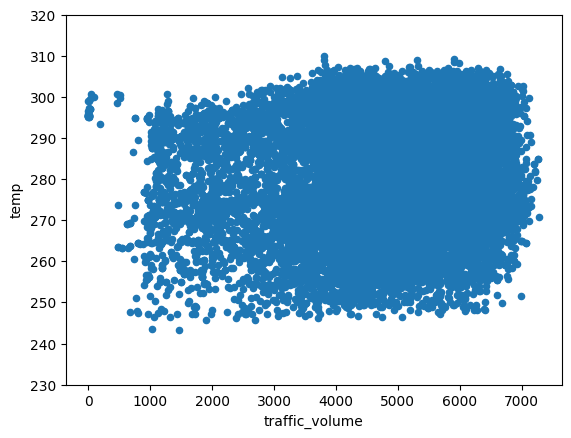

In [57]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230,320) #tested a few values before to check the best visualization
plt.show()

We can conclude that temperature doesn´t have a significant impact on traffic volume.

Let's now look at the other weather-related columns: weather_main and weather_description.

<ipython-input-64-50aaf01af70f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_main = day.groupby('weather_main').mean()


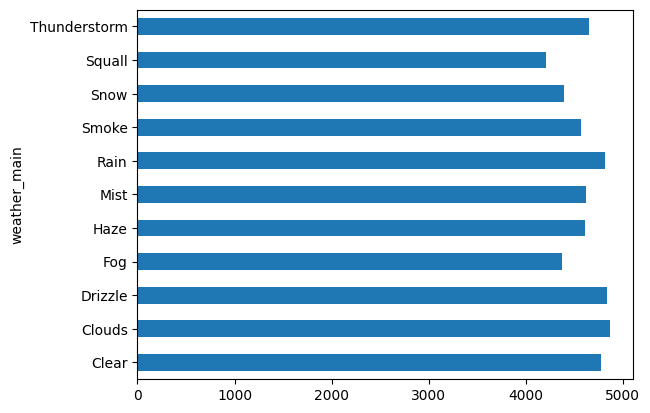

In [64]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

<ipython-input-65-3cc858cb92ed>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_description = day.groupby('weather_description').mean()


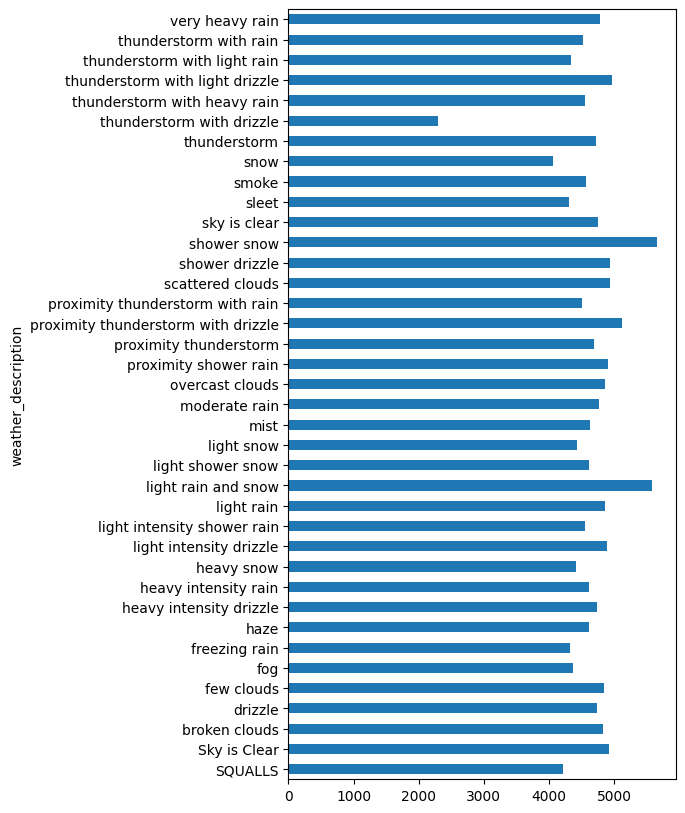

In [65]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

## Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

* **Time indicators:**

The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).

The traffic is usually heavier on business days compared to the weekends.

On business days, the rush hours are around 7 and 16.

* **Weather indicators:**

Shower snow

Light rain and snow

Proximity thunderstorm with drizzle